In [ ]:
import sympy
from IPython.display import Latex, Math, display
from sympy import Poly
from sympy.abc import s, z

from control.matlab import *

In [8]:
%pylab %matplotlib inline

Using matplotlib backend: TkAgg
Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


<div id="toc"></div>

# Introduction: Root Locus Controller Design

In this tutorial we will introduce the root locus, show how to create it using Python, and demonstrate how to design feedback controllers using the root locus that satisfy certain performance criteria.

## Closed-Loop Poles

The root locus of an (open-loop) transfer function \\(H(s)\\) is a plot of the locations (locus) of all possible closed-loop poles with proportional gain ```K``` and unity feedback.

![RootLocusTutorial_ClosedLoopPoles_BlockDiagram.png](figures/RootLocusTutorial_ClosedLoopPoles_BlockDiagram.png)

The closed-loop transfer function is:
$$
\frac{Y(s)}{R(s)} = \frac{KH(s)}{1 + KH(s)}
$$
and thus the poles of the closed-loop poles of the closed-loop system are values of \\(s\\) such that $1 + KH(s) = 0$. If we write $H(s) = b(s)/a(s)$, then this equation has the form:

$$
a(s) + Kb(s) = 0
$$

$$
\frac{a(s)}{K} + b(s) = 0
$$

Let \\(n\\) = order of \\(a(s)\\) and \\(m\\) = order of \\(b(s)\\) (the order of a polynomial is the highest power of \\(s\\) that appears in it). We will consider all positive values of ```K```.  In the limit as $K \rightarrow 0$, the poles of the closed-loop system are \\(a(s) = 0\\) or the poles of $H(s)$.  In the limit as $K \rightarrow \infty$, the poles of the closed-loop system are \\(b(s) = 0\\) or the zeros of $H(s)$. No matter what we pick ```K``` to be, **the closed-loop system must always have \\(n\\) poles**, where \\(n\\) is the number of poles of $H(s)$.  **The root locus must have \\(n\\) branches**, each branch starts at a pole of \\(H(s)\\) and goes to a zero of $H(s)$.

If \\(H(s)\\) has more poles than zeros (as is often the case), \\(m < n\\) and we say that \\(H(s)\\) has **zeros at infinity**. In this case, the limit of \\(H(s)\\) as \\(s \rightarrow \infty\\) is zero.  The number of zeros at infinity is $n-m$, the number of poles minus the number of zeros, and is the number of branches of the root locus that go to infinity (asymptotes).

Since the root locus is actually the locations of all possible closed-loop poles, from the root locus we can select a gain such that our closed-loop system will perform the way we want.  If any of the selected poles are on the right half plane, the closed-loop system will be unstable.  The poles that are closest to the imaginary axis have the greatest influence on the closed-loop response, so even though the system has three or four poles, it may still act like a second or even first order system depending on the location(s) of the dominant pole(s).

## Plotting the Root Locus of a Transfer Function

Consider an open-loop system which has a transfer function of:

$$
H(s) = \frac{Y(s)}{U(s)} = \frac{s + 7}{s(s + 5)(s + 15)(s + 20)}
$$

How do we design a feedback controller for the system by using the root locus method?  Say our design criteria are 5% overshoot and 1 second rise time.

In [9]:
# Helper Functions
def tex(eqn):
    # Quick way to display a symbolic equation.
    display(Math(sympy.latex(eqn)))


def sym_to_tf(sym_sys):
    # Convert symbolic equation into a transfer function.
    sym_num = sympy.Poly(sympy.numer(sym_sys))
    sym_den = sympy.Poly(sympy.denom(sym_sys))
    num = float64(sym_num.all_coeffs())
    den = float64(sym_den.all_coeffs())
    sys = tf(num, den)
    return sys


<IPython.core.display.Math object>

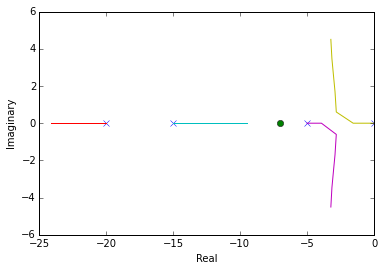

In [17]:
sym_sys = (s + 7) / (s * (s + 5) * (s + 15) * (s + 20))
tex(sym_sys)
sys = sym_to_tf(sym_sys)
rlist, klist = rlocus(sys)


## No Python Equivalents

For the rest of this introduction I haven't found equivalent Python functions. If you know of a toolbox or have written a function to do any of these this create an issue or pull request.

## Choosing a Value of K from the Root Locus

The plot above shows all possible closed-loop pole locations for a pure proportional controller.  Obviously not all of those closed-loop poles will satisfy our design criteria,  To determine what part of the locus is acceptable, we can use the command ```sgrid(Zeta,Wn)``` to plot lines of constant damping ratio and natural frequency.  Its two arguments are the damping ratio ($\zeta$) and natural frequency ($\omega_n$) [these may be vectors if you want to look at a range of acceptable values].  In our problem, we need an overshoot less than 5% (which means a damping ratio \\(\zeta\\) of greater than 0.7) and a rise time of 1 second (which means a natural frequency \\(\omega_n\\) greater than 1.8).

In [3]:
# Zeta = 0.7;
# Wn = 1.8;
# sgrid(Zeta,Wn)


On the plot above, the two dotted lines at about a 45 degree angle indicate pole locations with \\(\zeta\\) = 0.7; in between these lines, the poles will have \\(\zeta\\) > 0.7 and outside of the lines \\(\zeta\\) < 0.7.  The semicircle indicates pole locations with a natural frequency \\(\omega_n\\) = 1.8; inside the circle, \\(\omega_n\\) < 1.8 and outside the circle \\(\omega_n\\) > 1.8. Going back to our problem, to make the overshoot less than 5%, the poles have to be in between the two white dotted lines, and to make the rise time shorter than 1 second, the poles have to be outside of the white dotted semicircle.  So now we know only the part of the locus outside of the semicircle and in betwen the two lines are acceptable.  All the poles in this location are in the left-half plane, so the closed-loop system will be stable. From the plot above we see that there is part of the root locus inside the desired region.  So in this case, we need only a proportional controller to move the poles to the desired region.  You can use the |rlocfind| command in MATLAB to choose the desired poles on the locus: |[k,poles] = rlocfind(sys)| Click on the plot the point where you want the closed-loop pole to be. You may want to select the points indicated in the plot below to satisfy the design criteria.
![RootLocusTutorial_NewKValue_rlocfindplot.png](figures/RootLocusTutorial_NewKValue_rlocfindplot.png)
Note that since the root locus may have more than one branch, when you select a pole, you may want to find out where the other pole (poles) are. Remember they will affect the response too.  From the plot above, we see that all the poles selected (all the "+" signs) are at reasonable positions.  We can go ahead and use the chosen |K| as our proportional controller.

## Closed-Loop Response

In order to find the step response, you need to know the closed-loop transfer function.  You could compute this using the rules of block diagrams, or let MATLAB do it for you (there is no need to enter a value for |K| if the |rlocfind| command was used):

In [4]:
# K = 350;
# sys_cl = feedback(K*sys,1)


The two arguments to the function |feedback| are the numerator and denominator of the open-loop system.  You need to include the proportional gain that you have chosen.  Unity feedback is assumed. If you have a non-unity feedback situation, look at the help file for the MATLAB function |feedback|, which can find the closed-loop transfer function with a gain in the feedback loop. Check out the step response of your closed-loop system:

In [5]:
# step(sys_cl)


As we expected, this response has an overshoot less than 5% and a rise time less than 1 second.

## Using SISOTOOL for Root Locus Design

Another way to complete what was done above is to use the interactive MATLAB GUI called |sisotool|.  Using the same model as above, first define the plant, $H(s)$.

In [6]:
# s = tf('s');
# plant = (s + 7)/(s*(s + 5)*(s + 15)*(s + 20));


In [7]:
%%javascript
$.getScript('https://kmahelona.github.io/ipython_notebook_goodies/ipython_notebook_toc.js')

<IPython.core.display.Javascript object>